<a href="https://colab.research.google.com/github/fedjkeee/Homework/blob/main/HW_Lession_9_10/HW_lessons_9_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание

Ноутбук в колаб: https://colab.research.google.com/drive/1UciedtsdZ5rhNuPhdQP1d3yBb-JOxN5T?usp=sharing

**Дедлайн: 01.01.2021, 23:59**


Формат отчетности - jupyter notebook. Однако вычислять производные не обязательно в Markdown. Если вычисляете вручную, то дополнительно с ноутбуком, отправляйте pdf-файл с расписанным решением.

### Пример реализации градиентного спуска: https://github.com/ddvika/Data-Science-School-2020/blob/main/lecture_9/gradient_methods.ipynb

# Задания

Перед выполнением ДЗ посмотрите на ноутбук, прикрепленный по ссылке выше. Там вы найдете реализацию градиентного спуска с постоянным и дробным шагом.

### Задание 1. [1 point]

Релизуйте градиентный спуск с постоянным шагом и с дробным шагом для функции
$$
y = x_{1}^{2}+5 x_{2}^{2}
$$

в произвольно выбранной Вами точке.

Поэксперементируйте с разными значениями шага (скорости обучения), попробуйте хотя бы по 2-3 разных значения.

### Задание 2. [3 points]

Для функции из предыдущего задания реализуйте градиентный спуск, в котором значение шага (скорости обучения) будет изменяться по формуле циклического косинусного ожига. ( в англ. литературе - cosine annealing learning rate или cosine decay lr). 

Доп. литература:
- Циклический косинусный отжиг https://habr.com/ru/post/332534/

- Пример colise decay в библиотеке Pytorch:
https://www.programmersought.com/article/12164650026/

### Задание 3. [0.75 point]
Проверьте работу Вашего градиентного спуска с косинусным отжигом на произвольной функции ( полином должен быть не меньше 3-ьего порядка и задан в пространстве не меньше $R^3$).

### Задание 4.
Случайная величина X задана следующей функцией распределения:
$$
f(x)=\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
-\cos x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 0 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

1. Постройте данную функцию распределения при помощи библиотеки seaborn **[0.25 point]**
2. Найдите плотность вероятности. **[1 point]**
3. Постройте график полученной плотности вероятности **[0.25 point]**

4. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$ **[0.75 point]**

5. Найти математическое ожидание и дисперсию случайной величины X . **[0.75 point]**

Так как мы не проходили интегрирование, то в 4 и 5 пунктах можете использовать
wolfram alpha (https://www.wolframalpha.com) для интегрирования. Однако 2ой пункт задания (на нахождение производной) должен быть расписан!

### Задание 5 [1.5 point]

 Случайная величина Х задана функцией распределения F(x).

 $$F(x)=\left\{\begin{array}{c}0, x \leq 1 \\ x-1,1<x \leq 2 \\ 1, x>2\end{array}\right.$$

 1. Является ли случайная величина Х непрерывной?

 2. имеет ли случайная величина Х плотность вероятности f(X)? Если имеет, найти ее. 
 3. постройте графики f(X) и F(X), если такое возможно.


### Задание 6

Рассмотрим несбалансированный набор данных с соотношением меньшего класса к большему 1: 100, где 100 экземпляров принадлежит меньшему классу, а 10 000 большему.

Модель ML делает прогнозы и предсказывает 120 примеров как принадлежащих к классу меньшинства, 90 из которых верны, а 30 - неверны.

Найти:

- Precision **[0.5 point]**
- Recall **[0.5 point]**
- $F_1$ метрику **[0.5 point]**

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### 1
Релизуйте градиентный спуск с постоянным шагом и с дробным шагом для функции
$$
y = x_{1}^{2}+5 x_{2}^{2}
$$

в произвольно выбранной Вами точке.

In [4]:
def f(x):
    return x[0]**2+5*x[1]**2
    
def grad_f(x):
    return np.array([2*x[0], 10*x[1]])

In [5]:
x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f([X, Y])

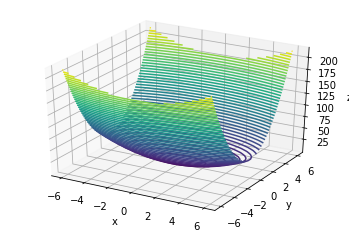

In [6]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

Градиентный спуск с постоянным шагом

In [7]:
def grad_descent_const_step(x = np.array([0, 0]), alpha = 0.001, epsilon = 0.05):
    grad = grad_f(x)
    n = 0
    check = 0
    while (np.linalg.norm(grad) > epsilon) or (check < 3):
        x = x - alpha*grad
        grad = grad_f(x)
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    print("Градиентный спуск с постоянным шагом выполнил {} шагов".format(n))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [8]:
#alpha 0.1
grad_descent_const_step(x=[1,1],alpha=0.1)

Градиентный спуск с постоянным шагом выполнил 19 шагов
Точка с координатами х1 = 0.014411518807585589, x2 = 0.0


array([0.01441152, 0.        ])

In [9]:
#alpha 0.01
grad_descent_const_step(x=[1,1],alpha=0.01)

Градиентный спуск с постоянным шагом выполнил 185 шагов
Точка с координатами х1 = 0.02381354235199539, x2 = 3.426606593921724e-09


array([2.38135424e-02, 3.42660659e-09])

In [10]:
#alpha 0.001
grad_descent_const_step(x=[1,1],alpha=0.001)

Градиентный спуск с постоянным шагом выполнил 1845 шагов
Точка с координатами х1 = 0.024879902563127755, x2 = 8.849811746717511e-09


array([2.48799026e-02, 8.84981175e-09])

Градиентный спуск с дроблением шага

In [11]:
def grad_descent_step_splitting(x = np.array([0, 0]), alpha = 1, epsilon = 0.05, ksi = 0.5, lambda_d = 0.35):
    grad = grad_f(x)
    n = 0
    n_alpha = 0
    alpha_k = alpha
    x_k0 = x
    check = 0
    while np.linalg.norm(grad) > epsilon or check < 3:
        grad = grad_f(x_k0)
        x_k1 = x_k0 - alpha_k*grad
        while f(x_k1) - f(x_k0) > - alpha_k * ksi * (np.linalg.norm(grad)**2):
            alpha_k *= lambda_d
            x_k1 = x_k0 - alpha_k*grad
            n_alpha+=1
        x_k0 = x_k0 - alpha_k*grad
        alpha_k = alpha
        n+=1
        if (np.linalg.norm(grad) <= epsilon): check +=1
    x = x_k0
    print("Градиентный спуск с дроблением шага выполнил {} шагов".format(n))
    print("Выполнено {} итераций дробления шага".format(n_alpha))
    print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))
    return x

In [12]:
#alpha=0.1
grad_descent_step_splitting([1,1], alpha=0.1)

Градиентный спуск с дроблением шага выполнил 20 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0.01152921504606847, x2 = 0.0


array([0.01152922, 0.        ])

In [13]:
#alpha=0.01
grad_descent_step_splitting([1,1], alpha=0.01)

Градиентный спуск с дроблением шага выполнил 186 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0.023337271504955483, x2 = 3.0839459345295514e-09


array([2.33372715e-02, 3.08394593e-09])

In [14]:
#alpha=0.001
grad_descent_step_splitting([1,1], alpha=0.001)

Градиентный спуск с дроблением шага выполнил 1846 шагов
Выполнено 0 итераций дробления шага
Точка с координатами х1 = 0.0248301427580015, x2 = 8.761313629250336e-09


array([2.48301428e-02, 8.76131363e-09])

### 2
 Для функции из предыдущего задания реализуйте градиентный спуск, в котором значение шага (скорости обучения) будет изменяться по формуле циклического косинусного ожига. ( в англ. литературе - cosine annealing learning rate или cosine decay lr).

Из статьи (https://arxiv.org/pdf/1704.00109.pdf)
$$ \alpha(t) = \frac{\alpha_0}{2}(cos(\frac{\pi mod(t-1,[T/M])}{[T/M]})+1) $$,
где t- текущая итерация, T- общее кол-во итераций, M- кол-во циклов



In [15]:
def cos_decay_lr(learning_rate_base,t,t_total=500,M=10):
  learning_rate = 0.5 * learning_rate_base * (1 + np.cos(
      ((np.pi * np.mod((t),int(t_total/M)))/int(t_total/M))
      ))
  return learning_rate


def grad_cosine_decay_lr(x = np.array([0, 0]), alpha = 0.1, t_total =500, M=10):
    grad = grad_f(x)
    lr=alpha
    lr_all=[] # сохраним значения learning rate
    X = [] # будем сохранять значение X в конце каждого цикла
    for t in range (0,t_total):
      if np.mod(t,int(t_total/M)) == t_total/M -1 or (t == t_total-1):
        x = x - lr*grad
        grad = grad_f(x)
        X.append(x)
        lr=alpha # сбрасываем learning rate в конце каждого цикла M
        lr_all.append(lr)
      else:
        x = x - lr*grad
        grad = grad_f(x)
        lr = cos_decay_lr(lr,t)
        lr_all.append(lr)
    return X,lr_all
    


In [16]:
#Выполним градиентный спуск
X,lr_all = grad_cosine_decay_lr([1,1],alpha=0.09)

In [17]:
# координаты точек в конце каждого цикла
for x in X:
  print("Точка с координатами х1 = {}, x2 = {}".format(x[0], x[1]))

Точка с координатами х1 = 0.06751042626781348, x2 = 1.0574283055761104e-11
Точка с координатами х1 = 0.004557657654861879, x2 = 1.1181546214335663e-22
Точка с координатами х1 = 0.0003076894110624885, x2 = 1.182368346714597e-33
Точка с координатами х1 = 2.0772243298921073e-05, x2 = 1.2502697574332472e-44
Точка с координатами х1 = 1.4023429996488936e-06, x2 = 1.3220706311156964e-55
Точка с координатами х1 = 9.467277367998095e-08, x2 = 1.3979949073126129e-66
Точка с координатами х1 = 6.391399307091744e-09, x2 = 1.4782793860436106e-77
Точка с координатами х1 = 4.314860916695711e-10, x2 = 1.563174466352187e-88
Точка с координатами х1 = 2.912980997724556e-11, x2 = 1.6529449272746357e-99
Точка с координатами х1 = 1.9665658886642537e-12, x2 = 1.7478707536586487e-110


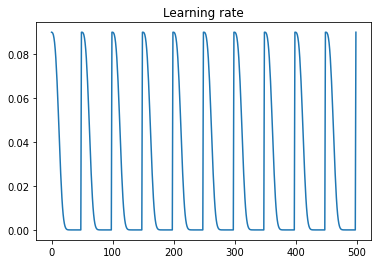

In [18]:
#посмотрим как менялась скорость обучения
plt.figure(figsize=(6,4))
plt.title('Learning rate')
plt.plot(range(0,500),lr_all)

### 3
Проверьте работу Вашего градиентного спуска с косинусным отжигом на произвольной функции ( полином должен быть не меньше 3-ьего порядка и задан в пространстве не меньше $R^3$).

$$ y = 2x_1^3+3x_2^2+2x_3^2+10$$

In [19]:
def f(x):
    return 2*x[0]**3+3*x[1]**2+x[2]**2+10
def grad_f(x):
    return np.array([6*x[0]**2, 6*x[1],2*x[2]])

In [20]:
X,lr_all = grad_cosine_decay_lr([1,1,1],alpha=0.1,t_total=300,M=5)

In [21]:
# координаты точек в конце каждого цикла
for x in X:
  print("Точка с координатами х1 = {}, x2 = {}, x3 = {}".format(x[0], x[1],x[2]))

Точка с координатами х1 = 0.09044135218891429, x2 = 9.183737190333415e-06, x3 = 0.04862171980709657
Точка с координатами х1 = 0.06832349695315185, x2 = 1.010604578547552e-07, x3 = 0.014080721488459551
Точка с координатами х1 = 0.06162865766153794, x2 = 1.3364323462040007e-08, x3 = 0.008092626848591989
Точка с координатами х1 = 0.05830907451493546, x2 = 3.8611969257678686e-09, x3 = 0.005845962689582252
Точка с координатами х1 = 0.05607275864983649, x2 = 1.4490753835476116e-09, x3 = 0.004580190486976782


###  4
Случайная величина X задана следующей функцией распределения:
$$
f(x)=\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
-\cos x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 0 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

1. Постройте данную функцию распределения при помощи библиотеки seaborn **[0.25 point]**
2. Найдите плотность вероятности. **[1 point]**
3. Постройте график полученной плотности вероятности **[0.25 point]**

4. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$ **[0.75 point]**

5. Найти математическое ожидание и дисперсию случайной величины X . **[0.75 point]**

Так как мы не проходили интегрирование, то в 4 и 5 пунктах можете использовать
wolfram alpha (https://www.wolframalpha.com) для интегрирования. Однако 2ой пункт задания (на нахождение производной) должен быть расписан!

В задании опечатка, дана плотность вероятности.
($$\text{Функция распределения не отвечает  свойствам функции распределения:
она убывает на отрезке от }\pi \text{до} \frac{3\pi}{2}\text{,
предел при x->}\infty \text{ равен 0 и в точке} \pi \text{- разрыв}$$ )

##### 1. Постройте данную ~~функцию распределения~~ плотность вероятности при помощи библиотеки seaborn

In [31]:
def f(x):
  return [0 if (i <= np.pi or i > 3/2*np.pi)  else -np.cos(i) for i in x]

In [32]:
x = np.linspace(np.pi/2,2*np.pi,100)

[Text(0, 0.5, 'f(x)'),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, 'Плотность вероятности')]

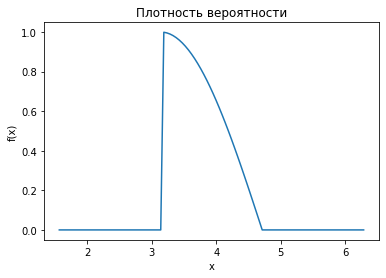

In [33]:
sns.lineplot(x=x,y=f(x)).set(title='Плотность вероятности', xlabel='x', ylabel='f(x)')

###### 2. Найдите функциюю распределения

$$
F(x)=
\left\{\begin{array}{r}
0 \text { npu } x \leq \pi \\
-\sin x \text { npu } \pi<x \leq \frac{3}{2} \pi \\
\text { 1 npu } x>\frac{3}{2} \pi
\end{array}\right.
$$

##### 3. Постройте график полученной ~~плотности вероятности~~ функции распределения

In [34]:
def f(x):
  return [0 if i <= np.pi else 1 if i > 3/2*np.pi  else -np.sin(i) for i in x]

[Text(0, 0.5, 'f(x)'),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, ' Функция распределения')]

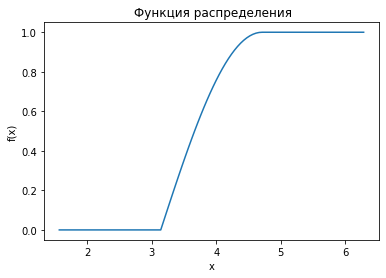

In [36]:
x = np.linspace(np.pi/2,2*np.pi,100)
sns.lineplot(x=x,y=f(x)).set(title=' Функция распределения', xlabel='x', ylabel='f(x)')

##### 4. Определить вероятность попадания случайной величины X в интервал $\left[\pi, \frac{5}{4} \pi\right]$ **[0.75 point]**

$$ P(\pi \leq X \leq \frac{5}{4} \pi) =F(\frac{5}{4} \pi)-F(\pi)= -\sin(\frac{5}{4} \pi) \approx 0.707 $$

In [49]:
np.cos(3*np.pi/2)

-1.8369701987210297e-16

##### 5. Найти математическое ожидание и дисперсию случайной величины X .

$$ M(x) = \int_{-\infty}^\pi x 0 dx + \int_{\pi}^\frac{3 \pi}{2} x (-\cos(x))dx+\int_{\frac{3\pi}{2}}^\infty x  0 dx= (*)
$$



$$
 U=x,
dv=\cos(x) dx,
du=dx, v=\sin(x)
$$

$$(*)=-x\sin(x)-\cos(x)\rvert_{\pi}^{\frac{3\pi}{2}}=\frac{3\pi}{2} -1 \approx 3.7124 $$

$$ D(x) = \int_{\pi}^\frac{3 \pi}{2} x^2 (-\cos(x))dx-M(x)^2= (*)
$$



$$
 u(x)=x^2,
dv=-\cos(x) dx,
du=2xdx, v=\sin(x)
$$

$$(*)=-(x^2-2)\sin(x) -2x\cos(x)\rvert_{\pi}^{\frac{3\pi}{2}}=
-2-2\pi+\frac{9\pi^2}{4} \approx 13.923 $$

### Задание 5 

 Случайная величина Х задана функцией распределения F(x).

 $$F(x)=\left\{\begin{array}{c}0, x \leq 1 \\ x-1,1<x \leq 2 \\ 1, x>2\end{array}\right.$$

 1. Является ли случайная величина Х непрерывной?

 2. имеет ли случайная величина Х плотность вероятности f(X)? Если имеет, найти ее. 
 3. постройте графики f(X) и F(X), если такое возможно.


1. Случайная величина непрерывная.
2. Плотность веротяности:
 $$F'(x)=\left\{\begin{array}{c}0, x \leq 1 \\ 1,1<x \leq 2 \\ 0, x>2\end{array}\right.$$


In [27]:
def f(x):
  return [0 if i <=1 else 1 if i > 2  else i-1   for i in x]

[Text(0, 0.5, 'f(x)'),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, 'Функция распределения')]

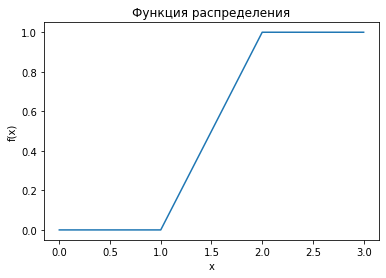

In [28]:
x = np.linspace(0,3,10)
sns.lineplot(x=x,y=f(x)).set(title='Функция распределения', xlabel='x', ylabel='f(x)')

[Text(0, 0.5, 'f(x)'),
 Text(0.5, 0, 'x'),
 Text(0.5, 1.0, 'Плотность вероятности')]

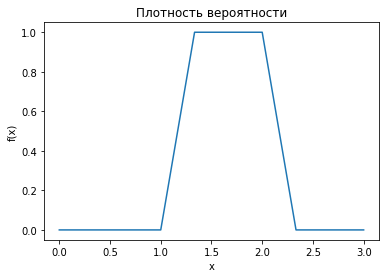

In [29]:
def f(x):
  return [0 if i <=1 or i >2 else 1 for i in x]
  x = np.linspace(0,5,100)
sns.lineplot(x=x,y=f(x)).set(title='Плотность вероятности', xlabel='x', ylabel='f(x)')

### 6

Рассмотрим несбалансированный набор данных с соотношением меньшего класса к большему 1: 100, где 100 экземпляров принадлежит меньшему классу, а 10 000 большему.

Модель ML делает прогнозы и предсказывает 120 примеров как принадлежащих к классу меньшинства, 90 из которых верны, а 30 - неверны.

Найти:

- Precision **[0.5 point]**
- Recall **[0.5 point]**
- $F_1$ метрику **[0.5 point]**

TP = 90
TN = 30
FN = 10
TN = 9970

$$ precision = \frac{TP}{TP+FP} = 0.75 $$



$$recall =\frac{TP}{TP+FN}=0,9 $$

$$F_1 =2 \frac{0,75 * 0,9}{0,75+0,9}=0.818$$